In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [86]:
clfs = []
cat = pd.read_csv('catboost_0.7251.csv') ; clfs.append(cat)
rf= pd.read_csv('randomforest_0.944_0.7267.csv') ; clfs.append(rf)
lgbm = pd.read_csv('lgbm_0.7157.csv') ; clfs.append(lgbm)
xgb= pd.read_csv('XGBoost_0.6863.csv') ; clfs.append(xgb)

In [87]:
data_id = cat.iloc[:,0]

In [89]:
log_loss = [0.7251,0.7267,0.7157,0.6863]

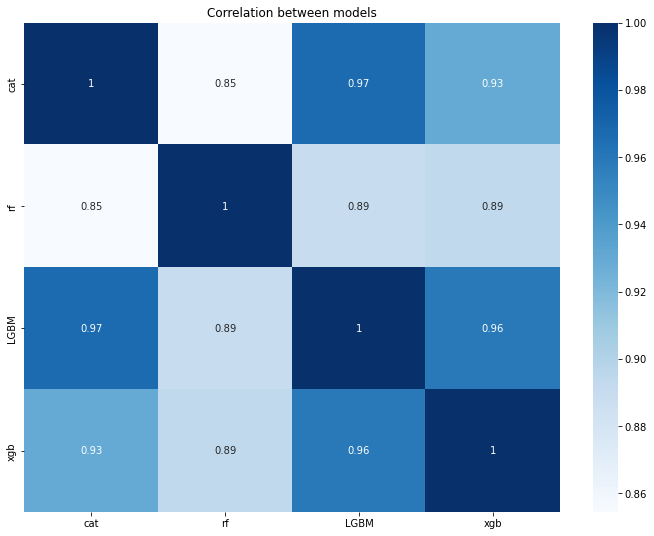

In [90]:
genders = []
for i in range(4):
    genders.append(clfs[i].iloc[:,-1])

ensemble_results = pd.concat(genders, axis=1)
col = ['cat','rf','LGBM', 'xgb']
ensemble_results.columns = col
plt.figure(figsize = (12,9))
g = sns.heatmap(ensemble_results.corr(),annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

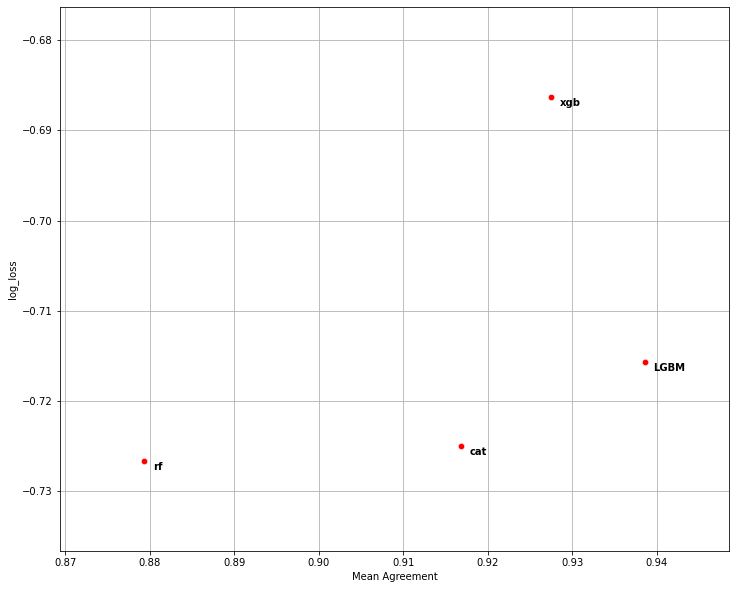

In [91]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index.str[:]
aucs = [-x for x in log_loss]
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(12,10))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.001, df.auc[line]-0.001, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('log_loss')
plt.grid()
plt.show()

In [13]:
col

['cat', 'rf', 'LGBM', 'xgb']

## 1)

In [106]:
weighted_average1 = []
for i in range(len(cat)):
    weighted_average1.append(lgbm.iloc[i,1]*0.13 + cat.iloc[i,1]*0.07 + xgb.iloc[i,1]*0.8 )

In [107]:
weighted_average2 = []
for i in range(len(cat)):
    weighted_average2.append(lgbm.iloc[i,2]*0.13+ cat.iloc[i,1]*0.07 +xgb.iloc[i,2]*0.8)

In [108]:
weighted_average3 = []
for i in range(len(cat)):
    weighted_average3.append(lgbm.iloc[i,3]*0.13+ cat.iloc[i,1]*0.07 +xgb.iloc[i,3]*0.8)

In [109]:
ensemble= pd.DataFrame({'index': cat.iloc[:,0], '0':weighted_average1, '1':weighted_average2,'2':weighted_average3})

In [110]:
ensemble

,index,0,1,2
0,26457,0.044370,0.096932,0.799090
1,26458,0.213971,0.154142,0.589973
2,26459,0.030212,0.034725,0.871323
3,26460,0.089189,0.086678,0.778750
4,26461,0.086448,0.165163,0.695691
...,...,...,...,...
9995,36452,0.113479,0.204729,0.644571
9996,36453,0.223072,0.243022,0.497794
9997,36454,0.035191,0.076581,0.830684
9998,36455,0.123078,0.235823,0.601270


In [111]:
ensemble.to_csv('ensemble6_0.13_0.07_0.8.csv',index= False)